# 訊號平滑 卷積練習I

In [18]:
import numpy as np
sig = np.repeat([0., 1., 0.], 100) # 0,1,0 各重複出現100次
print(sig)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
from scipy import signal
win_kernel = signal.hann(50) # 大小為50
print('kernel of th window : \n', win_kernel)
filtered = signal.convolve(sig, win_kernel, mode='same') / sum(win_kernel) # mode:預設為full，same為輸出大小與原本一樣
# /sum 是做標準化，以免kernel乘完越大或越小

kernel of th window : 
 [0.         0.00410499 0.01635257 0.03654162 0.06434065 0.09929319
 0.14082532 0.1882551  0.24080372 0.29760833 0.35773621 0.42020005
 0.48397421 0.54801151 0.61126047 0.67268253 0.73126915 0.78605833
 0.83615045 0.88072298 0.91904405 0.95048443 0.97452787 0.99077958
 0.9989727  0.9989727  0.99077958 0.97452787 0.95048443 0.91904405
 0.88072298 0.83615045 0.78605833 0.73126915 0.67268253 0.61126047
 0.54801151 0.48397421 0.42020005 0.35773621 0.29760833 0.24080372
 0.1882551  0.14082532 0.09929319 0.06434065 0.03654162 0.01635257
 0.00410499 0.        ]


C:\Users\TMU_AIMC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


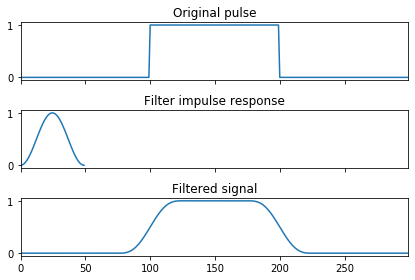

In [6]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True) #fig是底圖，3列1行，共用x軸

ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.05) # 藍線與圖框邊緣的距離

ax_win.plot(win_kernel)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.05)

ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_win.margins(0, 0.05)

fig.tight_layout() # 把三層圖分開
fig.show()

# 訊號平滑 卷積練習II  
視窗大小越小，訊號與原本較接近、平滑程度較不明顯

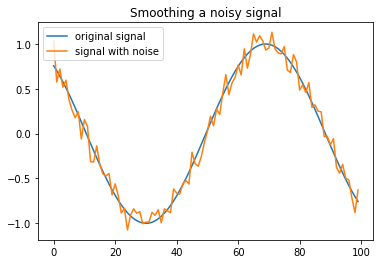

In [11]:
# Noisy signal generation
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-4, 4, 100) # -4~4 間 平均取100個數值
x = np.sin(t)

x_noisy = x + np.random.randn(len(t)) * 0.1 # -4~4的常態分佈大多介於-3~3，*0.1使之介於+-0.3(才不會影響sin)

legend_text = ['original signal','signal with noise']

plt.plot(x)
plt.plot(x_noisy)

plt.legend(legend_text)

plt.title('Smoothing a noisy signal')
plt.show()

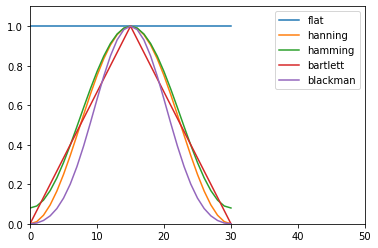

In [22]:
# Smooth Window
window_name = ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

ws=31

plt.plot(np.ones(ws)) # flat

for w in window_name[1:]:
    expression = 'np.' + w + '(' + str(ws) + ')' # put window in list , ex: plt.plot(np.hanning(31))
    plt.plot(eval(expression))
    
plt.legend(window_name)
plt.axis([0, 50, 0, 1.1])
plt.show()

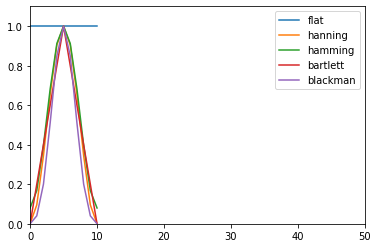

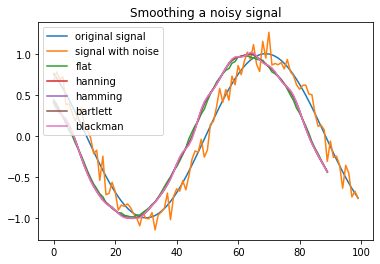

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def smooth(x, window_len = 11, window = 'hanning'):
    if window == 'flat':
        w = np.ones(window_len)
    else:
        w = eval('np.' + window + '(window_len)')
    
    y =  signal.convolve(w/w.sum(), x, mode='valid')
    return y

# Smooth Window Generation
t=np.linspace(-4, 4, 100)
window_name=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
ws=11  # window size 調越大越平滑，但平移越多
                 
plt.plot(np.ones(ws))
                 
for w in window_name[1:]:
    expression = 'np.' + w + '(' + str(ws) + ')' # put window in list , ex: plt.plot(np.hanning(31))
    plt.plot(eval(expression))
                 
plt.legend(window_name)
plt.axis([0, 50, 0, 1.1])
plt.show()

# Noisy Signal Generation
x=np.sin(t)
x_noisy=x+ np.random.randn(len(t))*0.1

legend_text=['original signal', 'signal with noise']

plt.plot(x)
plt.plot(x_noisy)

# Smooth (Filter) the Noisy signal
for w in window_name:
    plt.plot(smooth(x_noisy, ws, w))
    
legend_text.extend(window_name)
plt.legend(legend_text)
plt.title('Smoothing a noisy signal')
plt.show()